<a href="https://colab.research.google.com/github/ramabhargavivempolu/Comet-Fragmentation/blob/main/Comet_Fragmentation_FM_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guide to Running Code and Downloading a CSV File in Google Colab

**Access Google Colab:** Open your browser and navigate to Google Colab. Ensure you're logged into your Google account.

**Open Your Notebook:** If you've received a link to a Google Colab notebook, click on that link. If you're starting from the Google Colab homepage, you can click on the File menu and select Open notebook to choose your desired notebook.

**Run the Code:**

* Go to the top menu bar.
* Find the menu labeled Runtime.
* Click on Runtime to reveal a dropdown menu.
* From the dropdown, select Run all. This will execute all the code cells in the notebook from top to bottom.

**Locate the Files Section:**

* On the left-hand side of the screen, you will see several icons.
* Look for the folder-shaped icon and click on it. This is the Files section where all files generated or uploaded during your Colab session are stored.

**Download Your CSV File:**

* In the Files section, browse through the list to locate your CSV file.
* Right-click on the file name.
* From the dropdown menu, select Download. The file will be downloaded to the default downloads folder of your browser/computer.

# **Fractional Methodology (FM)**

The GSMPython is a Python script used to model the fragmentation and fragment separation processes of a comet under different structural assumptions. The comet fragmentation happens in a sequence of generations In each generation, the comet breakup can be modeled in two ways. The broken fragment can be kept as a fraction of the original fragment (the fractional methodology—FM) or in each generation the fractions can be rounded to fundamental fragments (the fundamental fragment methodology—FFM). This section focuses on and describes the python script developed according to the fractional methodology (FM). The results of FFM and FM methodologies are very much the same. The choice between the two methodologies is a user preference.

In [ ]:
# @title Importing Libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import csv

The code given is used to model the fragmentation and separation processes of a comet when exposed to different conditions. In this scenario, the input parameters are the values of nf, ns, d_comet, and n.

nf represents the number of fundamental fragments in each generation, ns indicates the separation between two fragments, d_comet is the diameter of the comet, and n refers to the total number of generations to model.

The code contains several functions, each responsible for a part of the modeling process. It also includes data visualization using matplotlib to display the fragmentation and separation process over generations.

In [ ]:
# @title Calculating Fragmentation and Separation
def fragment_chain(nf, ns, nmax, n):
    # Calculating the length of the fragment chain for each generation
    fragment_chain_values = []
    for n_gen in range(1, int(n+1)):
        Ln = (nf*ns - (ns - 1) + ns*(nf-1)*(n_gen-1))
        # Convert to float for decimal calculations, then round to nearest integer
        Ln = round(float(Ln), 3)  # increase the decimal places for better precision
        fragment_chain_values.append(int(round(Ln)))  # rounding and converting to int
    return fragment_chain_values


def fragmentation_and_separation(nf, clusters):
    fragmentation_results = []
    for i in range(len(clusters)):
        sub_cluster = [round((clusters[i]/nf),3)]*nf
        for j in range(i):
            sub_cluster.insert(0, 0)
            sub_cluster.append(0)
        fragmentation_results.append(sub_cluster)
    return fragmentation_results

def separation(nf, clusters, ns, n_1, nmax, n):
    fragmentation_results = []
    for i in range(len(clusters)):
        sub_cluster = []
        for j in range(nf):
            # calculate base case for zeros
            if ns % 2 == 0:
                zeros = ns + (ns - 1) * (2 * 1 - 1)
            else:
                zeros = (ns) + (ns-1)

            # additional ns for n_1 > 1
            if n_1 > 1:
                zeros += ns * (n_1 - 1)

            sub_cluster.extend([clusters[i] / nf] + [0] * zeros)
        sub_cluster = [0] * (ns * i) + sub_cluster
        fragmentation_results.append(sub_cluster)
    return fragmentation_results


def layout_and_addition(results):
    length = max([len(r) for r in results])
    addition_results = [0]*length
    for r in results:
        for i in range(len(r)):
            addition_results[i] += r[i]
    # Rounding and removing trailing zeros
    addition_results = [round(num,3) for num in addition_results]
    while addition_results and addition_results[-1] == 0.0:
        addition_results.pop()
    return addition_results

In [ ]:
# @title Comet Fragmentation and Separation Simulation
def main():
    nf = int(input("Enter the value of nf (nf>=2): "))
    ns = int(input("Enter the value of ns (ns>=1): "))
    d_comet = float(input("Enter the diameter of comet in km: "))
    ns_1 = ns - 1
    n = int(input("Enter the value of n (1 <= n <= 100): "))
    if not (nf >= 2 and ns >= 1 and 1 <= n <= 100 and d_comet <= 400):
        print("Input values out of valid range.")
        return

    d_SL9 = 2
    V_SL9 = 4/3 * np.pi * (d_SL9/2)**3
    V_comet = 4/3 * np.pi * (d_comet/2)**3

    ne = V_comet / V_SL9

    Ne = round(21 * ne)
    print(f"Number of fundamental fragments for {d_comet} km comet: {Ne}")
    No = Ne
    nmax = math.log10(No) / math.log10(nf)
    nmax = int(nmax)
    print(f"Number of generations it takes for a {d_comet} km comet to get exhausted: {nmax}")
    n_sep = n-nmax

    patterns_with_none = []

    clusters = [int(Ne)]
    generation_3_clusters = []

    print("Fragmentation and Separation phase:")
    # Add a row for the header of CSV
    csv_rows = [['Generation']]
    fragment_chain_values = fragment_chain(nf, ns, nmax, n)
    for i in range(1, min(nmax + 1, n + 1)):
        print(f"Generation {i}: ", end='')
        fragmentation_results = fragmentation_and_separation(nf, clusters)
        clusters = layout_and_addition(fragmentation_results)
        separator = ' ' + '0 ' * ns_1
        clusters_1 = [c for cluster in clusters for c in ([cluster] + [0] * ns_1)]
        while clusters_1 and clusters_1[-1] == 0:
            clusters_1.pop()
        patterns_with_none.append(clusters_1)
        print(separator.join(map(str, [round(num, 1) for num in clusters])))

        # Add each value in the pattern to CSV row
        pattern_values = clusters_1[::]
        sum_pattern_num = round(sum(pattern_values),1)
        sum_pattern_str = '="{:.1f}"'.format(sum_pattern_num)
        len_pattern = len(pattern_values)
        pattern_values_1 = [round(val, 1) if val != 0 else 0 for val in pattern_values]
        csv_rows.append([i, sum_pattern_num, len_pattern] + pattern_values_1)

        if i == (nmax-1):
            generation_3_clusters = clusters.copy()
    if n > nmax:
      print("Only Separation phase:")
      for n_1 in range(1, n_sep + 1):
          print(f"Generation {nmax + n_1}: ", end='')
          separation_results = separation(nf, generation_3_clusters, ns, n_1, nmax, n)
          clusters = layout_and_addition(separation_results)
          patterns_with_none.append(clusters)
          print(' '.join(map(str, [round(num, 1) for num in clusters])))

          # Add each value in the pattern to CSV row
          pattern_values = clusters
          sum_pattern_num = round(sum(pattern_values),1)
          sum_pattern_str = '="{:.1f}"'.format(sum_pattern_num)
          len_pattern_1 = len(pattern_values)
          pattern_values_1 = [round(val, 1) if val != 0 else 0 for val in pattern_values]
          csv_rows.append([nmax + n_1, sum_pattern_num, len_pattern_1] + pattern_values_1)

    # Write CSV rows to file
    with open('comet_fragmentation.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        # Add the header with new columns
        csv_rows[0] += ['Total Fragments', 'Chain Length','Fragment Distribution']
        writer.writerows(csv_rows)

    # Print fragment chain values separately
    print("Fragment chain length in ds units:")
    for i, chain_value in enumerate(fragment_chain_values, start=1):
        print(f"Generation {i}: {chain_value}")

    return patterns_with_none

Enter the value of nf (nf>=2): 3
Enter the value of ns (ns>=1): 2
Enter the diameter of comet in km: 100
Enter the value of n (1 <= n <= 100): 15
Number of fundamental fragments for 100.0 km comet: 2625000
Number of generations it takes for a 100.0 km comet to get exhausted: 13
Fragmentation and Separation phase:
Generation 1: 875000.0 0 875000.0 0 875000.0
Generation 2: 291666.7 0 583333.3 0 875000.0 0 583333.3 0 291666.7
Generation 3: 97222.2 0 291666.7 0 583333.3 0 680555.6 0 583333.3 0 291666.7 0 97222.2
Generation 4: 32407.4 0 129629.6 0 324074.1 0 518518.5 0 615740.7 0 518518.5 0 324074.1 0 129629.6 0 32407.4
Generation 5: 10802.5 0 54012.3 0 162037.0 0 324074.1 0 486111.1 0 550925.9 0 486111.1 0 324074.1 0 162037.0 0 54012.3 0 10802.5
Generation 6: 3600.8 0 21604.9 0 75617.3 0 180041.2 0 324074.1 0 453703.7 0 507716.0 0 453703.7 0 324074.1 0 180041.2 0 75617.3 0 21604.9 0 3600.8
Generation 7: 1200.3 0 8401.9 0 33607.7 0 92421.1 0 193244.2 0 319273.0 0 428497.9 0 471707.8 0 42849

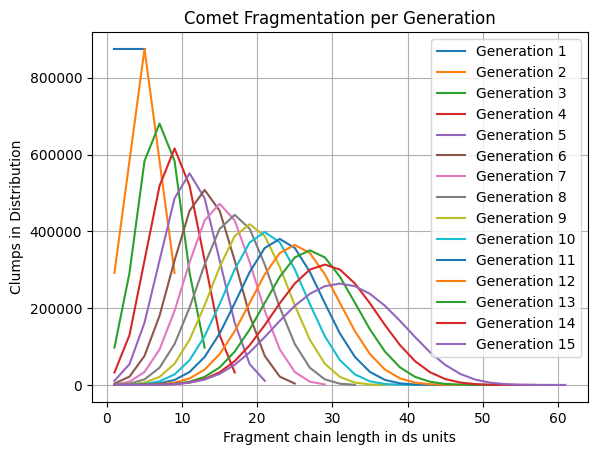

In [ ]:
# @title Visualizing Comet Fragmentation Patterns Over Multiple Generations
patterns_with_none = main()
if patterns_with_none is not None:
    for i, gen_pattern in enumerate(patterns_with_none):
        # Create x values - full range including 'None' places
        x_full_range = list(range(1, len(gen_pattern) + 1))

        # Create y values - length of fragment chain (gen_pattern remains as is, with None)
        y_full_range = gen_pattern

        # Exclude 'None' values from y for plotting
        y_for_plotting = [y for y in y_full_range if y != 0]

        # Include only corresponding x values for the above y (exclude indices where y is 'None')
        x_for_plotting = [x for x, y in zip(x_full_range, y_full_range) if y != 0]

        # Plot the generation
        plt.plot(x_for_plotting, y_for_plotting, label=f'Generation {i + 1}')

    # Set graph titles and labels
    plt.title('Comet Fragmentation per Generation')
    plt.xlabel('Fragment chain length in ds units')
    plt.ylabel('Clumps in Distribution')
    plt.grid(True)
    plt.legend()
    # Show the plot
    plt.show()
else:
    print("No patterns to display.")